<a href="https://colab.research.google.com/github/gbiamgaurav/Credit-card-frauds/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (4).json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d subhamjain/loan-prediction-based-on-customer-behavior

loan-prediction-based-on-customer-behavior.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip /content/loan-prediction-based-on-customer-behavior.zip

Archive:  /content/loan-prediction-based-on-customer-behavior.zip
replace Sample Prediction Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Sample Prediction Dataset.csv  
replace Test Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Test Data.csv           
replace Training Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Training Data.csv       


In [7]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
### Load the data 

training_data = pd.read_csv('/content/Training Data.csv')

In [9]:
training_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [10]:
training_data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [11]:
df = training_data.copy()
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [12]:
df.shape

(252000, 13)

In [13]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [14]:
### EDA

df.Income.mean()

4997116.665325397

In [15]:
df.Income.max()

9999938

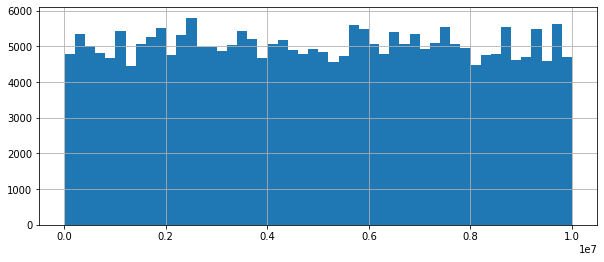

In [16]:
plt.figure(figsize=(10, 4))
df['Income'].hist(bins=50)

In [17]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [18]:
df['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

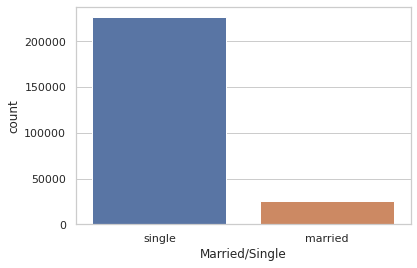

In [19]:
sns.set(style='whitegrid')

sns.countplot(x = 'Married/Single',
              data = df,
              order = df['Married/Single'].value_counts().index)
plt.show();

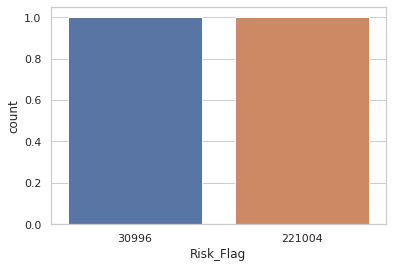

In [20]:
sns.countplot(df['Risk_Flag'].value_counts())

### Seems highly imbalanced data, we need to apply some sampling techniques

In [21]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [22]:
### Converting categorical into numerical columns

cat_cols = df.select_dtypes(include=['object'])

In [23]:
cat_cols.columns

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession',
       'CITY', 'STATE'],
      dtype='object')

In [24]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [25]:
df.rename(columns={'Married/Single': 'Marital_status'}, inplace=True)

In [26]:
df['House_Ownership'] = pd.factorize(df.House_Ownership)[0]
df['Car_Ownership'] = pd.factorize(df.Car_Ownership)[0]
df['Profession'] = pd.factorize(df.Profession)[0]
df['CITY'] = pd.factorize(df.CITY)[0]
df['STATE'] = pd.factorize(df.STATE)[0]
df['Marital_status'] = pd.factorize(df.Marital_status)[0]

In [27]:
df.head(2)

,Id,Income,Age,Experience,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,0,0,0,0,0,3,13,0
1,2,7574516,40,10,0,0,0,1,1,1,9,13,0


In [28]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Marital_status',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

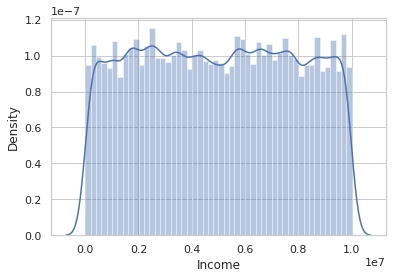

In [29]:
sns.distplot(df['Income'])

In [30]:
df['Income'].describe()

count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64

In [31]:
df.Marital_status.value_counts()

0    226272
1     25728
Name: Marital_status, dtype: int64

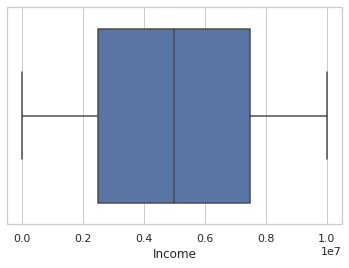

In [32]:
sns.boxplot(df['Income'])

In [33]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Marital_status',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

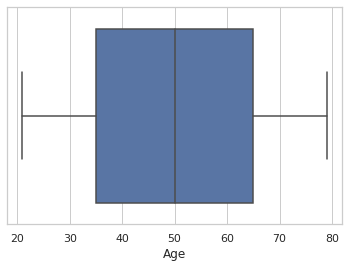

In [34]:
sns.boxplot(df['Age'])

In [35]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Marital_status',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [36]:
df.dtypes

Id                   int64
Income               int64
Age                  int64
Experience           int64
Marital_status       int64
House_Ownership      int64
Car_Ownership        int64
Profession           int64
CITY                 int64
STATE                int64
CURRENT_JOB_YRS      int64
CURRENT_HOUSE_YRS    int64
Risk_Flag            int64
dtype: object

In [37]:
df['Profession'].value_counts()

9     5957
41    5806
42    5397
32    5390
23    5372
40    5359
33    5357
30    5304
11    5281
20    5259
49    5250
0     5217
17    5205
2     5195
18    5178
10    5167
22    5166
6     5128
21    5127
25    5061
1     5053
24    5041
13    5035
26    4990
12    4944
29    4881
28    4864
14    4861
34    4818
43    4808
19    4782
47    4781
46    4772
31    4758
50    4737
16    4729
15    4714
39    4672
38    4668
45    4661
7     4657
44    4635
4     4628
48    4616
8     4598
5     4573
35    4507
27    4493
3     4413
37    4087
36    4048
Name: Profession, dtype: int64

In [38]:
df['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [39]:
corr_df = pd.DataFrame(df.corr())

In [40]:
corr_df.head()

,Id,Income,Age,Experience,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.001134,0.002527,-0.004313,0.000294,0.009448,-0.000948,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,-0.002682,-0.006412,0.004068,0.003720,-0.001462,-0.010806,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.005323,0.017551,0.009395,-0.009185,-0.010091,0.002756,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.001752,0.013346,0.007519,0.015169,-0.001547,-0.011294,0.646098,0.019309,-0.034523
Marital_status,-0.001134,-0.002682,0.005323,0.001752,1.000000,-0.026208,-0.001206,-0.005253,-0.007206,0.001582,-0.004251,0.007539,-0.021092


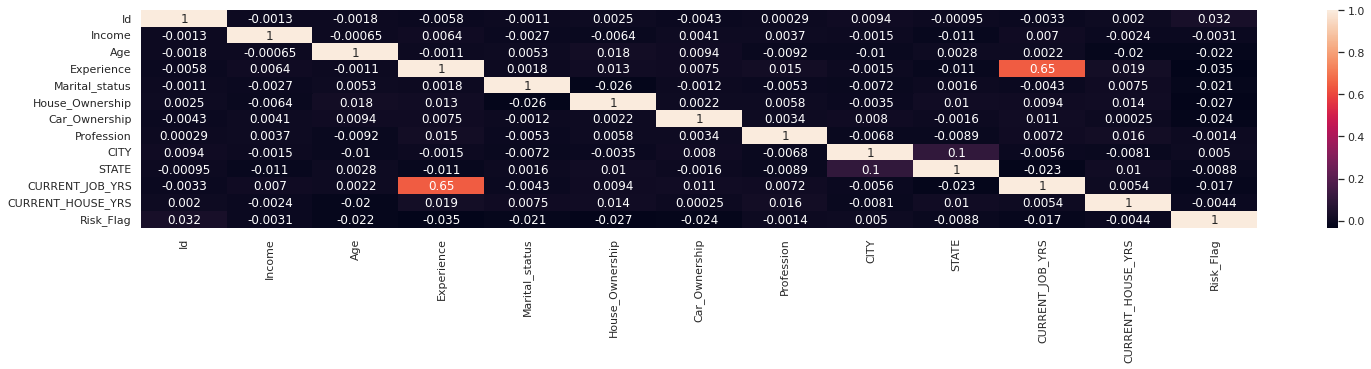

In [41]:
plt.figure(figsize=(25, 4))

sns.heatmap(corr_df, annot=True);

### We cant find much inferences from the heatmap

In [42]:
### Divide the data into X and y

X = df.iloc[:, :-1]

y = df.iloc[:, -1]

In [43]:
X.head()

,Id,Income,Age,Experience,Marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,1303834,23,3,0,0,0,0,0,0,3,13
1,2,7574516,40,10,0,0,0,1,1,1,9,13
2,3,3991815,66,4,1,0,0,2,2,2,4,10
3,4,6256451,41,2,0,0,1,1,3,3,2,12
4,5,5768871,47,11,0,0,0,3,4,4,3,14


In [44]:
X.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Marital_status       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [45]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Risk_Flag, dtype: int64

In [46]:
### Model Building

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [47]:
log_class = LogisticRegression()
grid = {"C": 10.0 ** np.arange(-2,3), 'penalty': ['l1', 'l2']}
cv = KFold(n_splits=5, shuffle=False)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
clf = GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [50]:
y_preds = clf.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.8767857142857143


In [51]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44190
           1       0.00      0.00      0.00      6210

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



In [52]:
print(confusion_matrix(y_test, y_preds))

[[44190     0]
 [ 6210     0]]


In [53]:
class_weights = {0: 1, 1: 100}

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight=class_weights)

In [55]:
model_1 = clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [56]:
y_preds = clf.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.9134722222222222


In [57]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     44190
           1       0.74      0.45      0.56      6210

    accuracy                           0.91     50400
   macro avg       0.84      0.72      0.76     50400
weighted avg       0.90      0.91      0.90     50400



In [58]:
print(confusion_matrix(y_test, y_preds))

[[43222   968]
 [ 3393  2817]]


#### Since its an highly imbalanced dataset apply under-sampling 

In [59]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [60]:
ns = NearMiss(0.8)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)

In [61]:
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_ns)))

The number of class before fit Counter({0: 176814, 1: 24786})
The number of class after fit Counter({0: 30982, 1: 24786})


In [62]:
y_train.value_counts()

0    176814
1     24786
Name: Risk_Flag, dtype: int64

In [63]:
y_train_ns.value_counts()

0    30982
1    24786
Name: Risk_Flag, dtype: int64

In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model_2 = clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [65]:
y_preds = clf.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[37896  6294]
 [ 1543  4667]]
0.8445039682539682
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     44190
           1       0.43      0.75      0.54      6210

    accuracy                           0.84     50400
   macro avg       0.69      0.80      0.72     50400
weighted avg       0.89      0.84      0.86     50400



#### Accuracy got reduced, we need to apply over-sampling technique

In [66]:
from imblearn.over_sampling import RandomOverSampler

ov = RandomOverSampler(0.5)

X_train_ov, y_train_ov = ov.fit_resample(X_train, y_train)

In [67]:
print("The number of class before fit {}".format(Counter(y_train)))
print("The number of class after fit {}".format(Counter(y_train_ov)))

The number of class before fit Counter({0: 176814, 1: 24786})
The number of class after fit Counter({0: 176814, 1: 88407})


In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model_3 = clf.fit(X_train_ov, y_train_ov)

In [69]:
y_preds = clf.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[42708  1482]
 [ 3103  3107]]
0.9090277777777778
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     44190
           1       0.68      0.50      0.58      6210

    accuracy                           0.91     50400
   macro avg       0.80      0.73      0.76     50400
weighted avg       0.90      0.91      0.90     50400



#### Hyperparameter Tuning 

In [70]:
clf = RandomForestClassifier()

In [71]:
model_4 = clf.fit(X_train_ov, y_train_ov)

RandomForestClassifier()

In [72]:
y_preds = clf.predict(X_test)

In [73]:
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[42720  1470]
 [ 3083  3127]]
0.9096626984126984
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     44190
           1       0.68      0.50      0.58      6210

    accuracy                           0.91     50400
   macro avg       0.81      0.74      0.76     50400
weighted avg       0.90      0.91      0.90     50400



In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
clf = DecisionTreeClassifier(random_state=0)

In [76]:
model_5 = clf.fit(X_train_ov, y_train_ov)

DecisionTreeClassifier(random_state=0)

In [77]:
y_preds = clf.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(accuracy_score(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[40753  3437]
 [ 3393  2817]]
0.864484126984127
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     44190
           1       0.45      0.45      0.45      6210

    accuracy                           0.86     50400
   macro avg       0.69      0.69      0.69     50400
weighted avg       0.86      0.86      0.86     50400

